In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as learn

In [4]:
train=pd.read_csv("train_ctrUa4K.csv")


In [5]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# This is an overlook of data we are dealing with.

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test=pd.read_csv("test_lAUu6dG.csv")
train_original=train.copy() 
test_original=test.copy()

In [10]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Overlook of test data

In [11]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Univariate Data Analysis

In [12]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [17]:
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

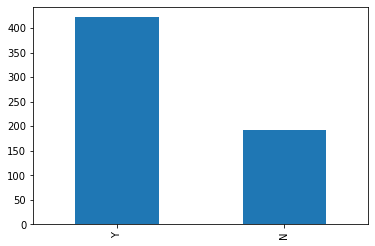

In [18]:
train['Loan_Status'].value_counts().plot.bar()

In [19]:
plt.figure(1) 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

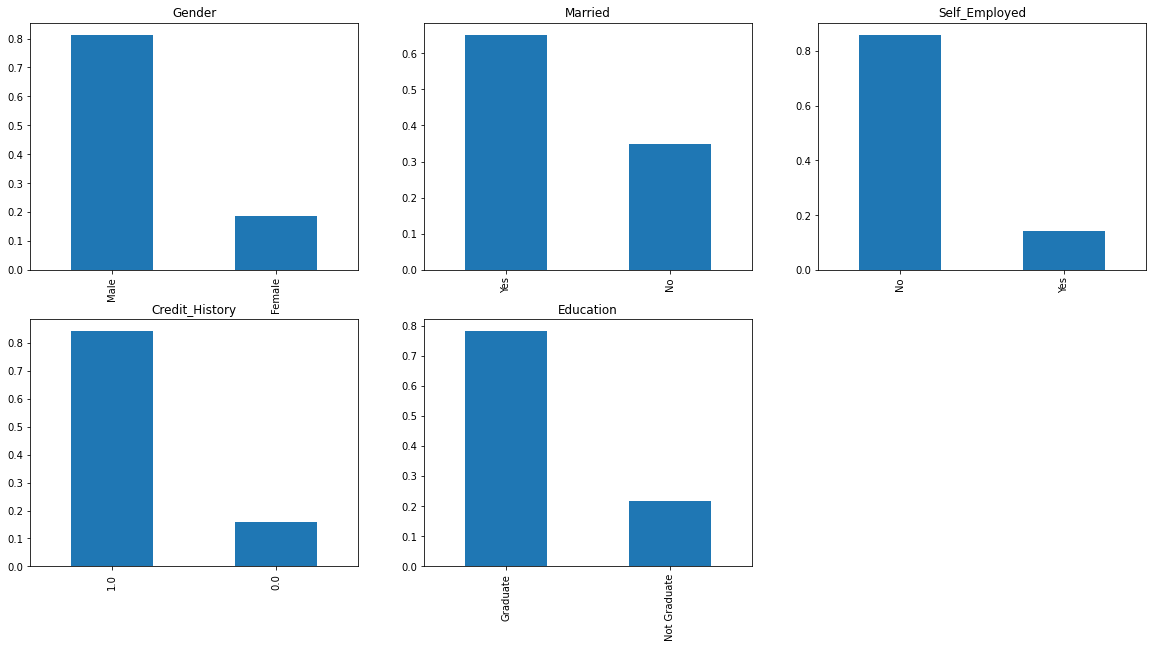

In [20]:
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

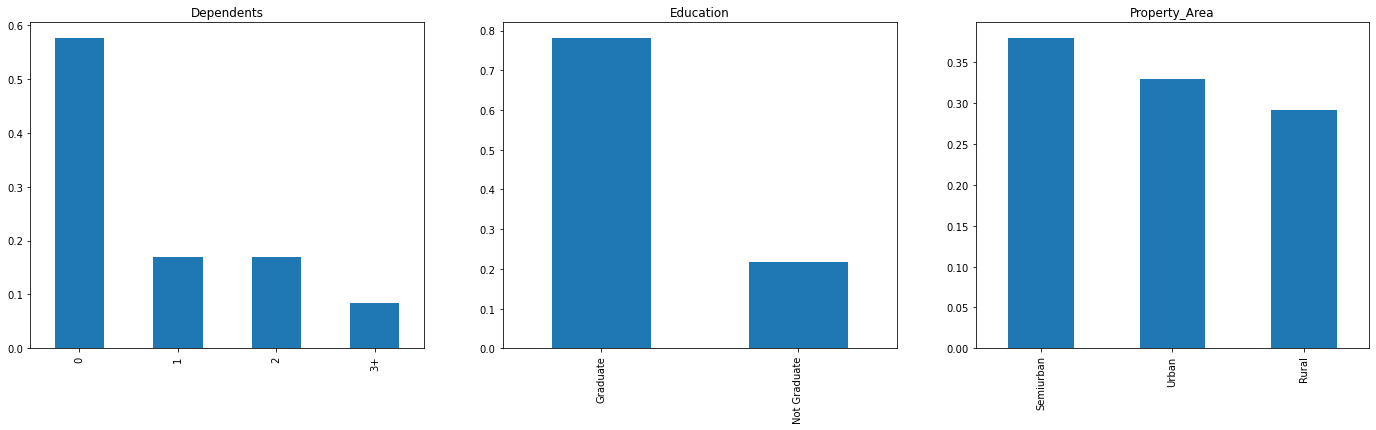

In [21]:
plt.figure(1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

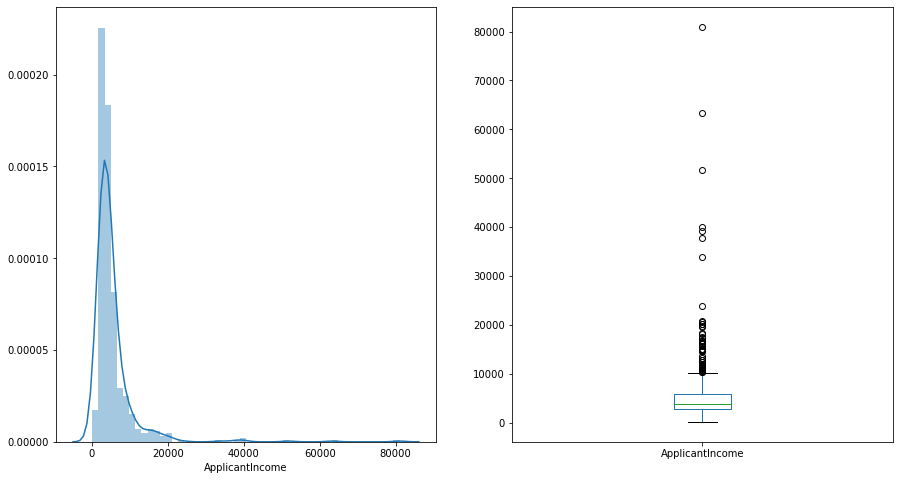

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,8)) 
plt.show()

Text(0.5, 0.98, '')

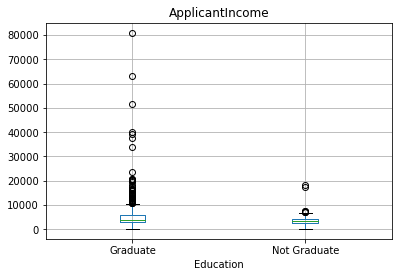

In [23]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")


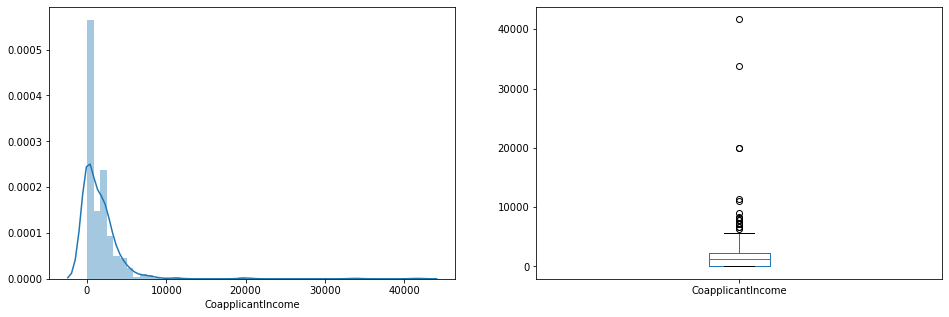

In [24]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

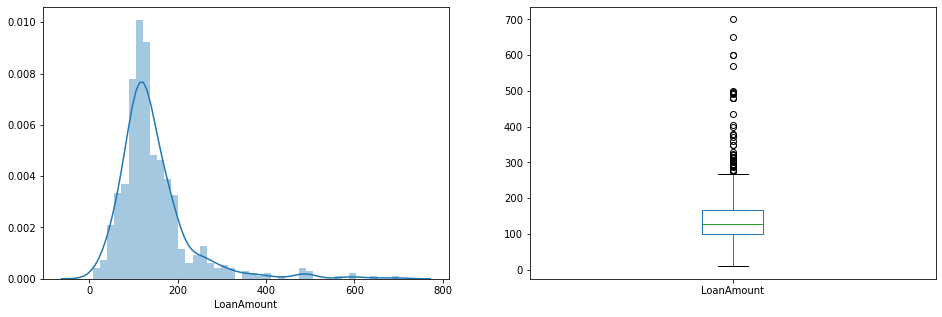

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

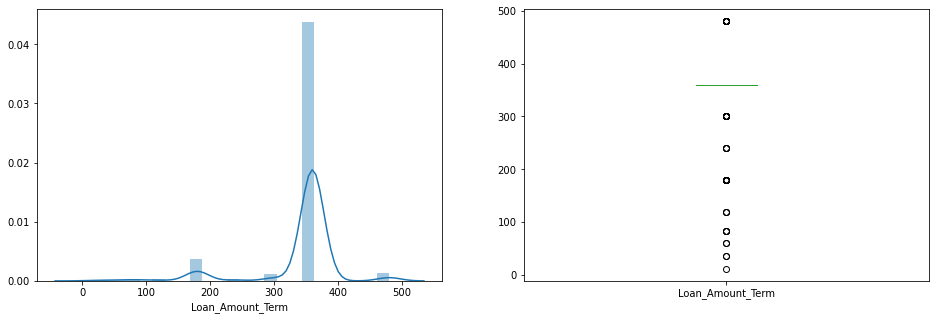

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Loan_Amount_Term']);
plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(16,5))
plt.show()


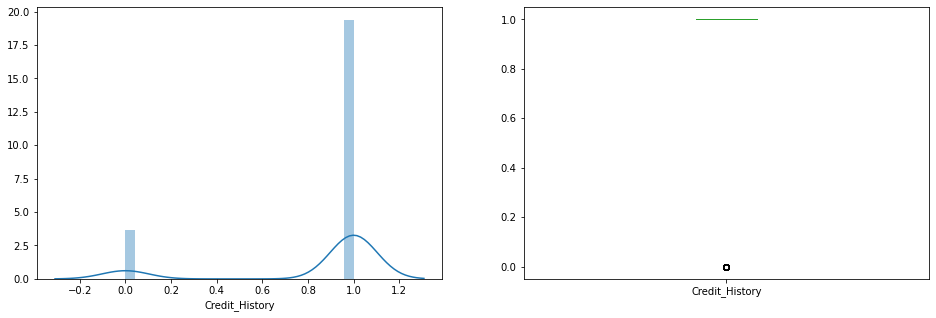

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Credit_History'])
plt.subplot(122)
train['Credit_History'].plot.box(figsize=(16,5))
plt.show()

In [29]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [28]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

# Bivariate Analysis

In [30]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])

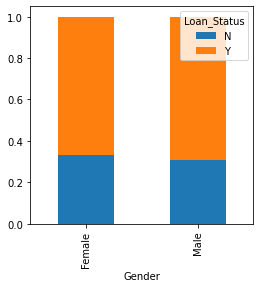

In [31]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [33]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])

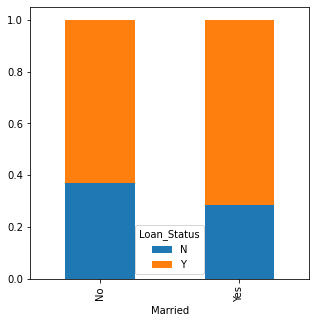

In [34]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5
                                                                                      ))

In [35]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])

In [36]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])

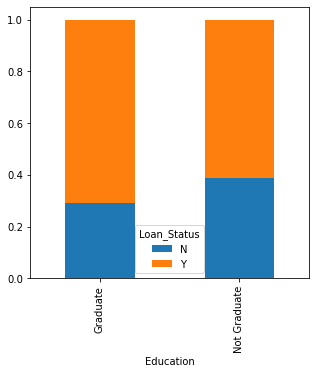

In [37]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

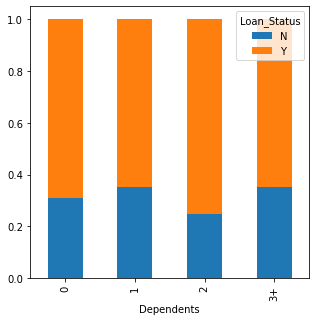

In [38]:
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

In [39]:
self_employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

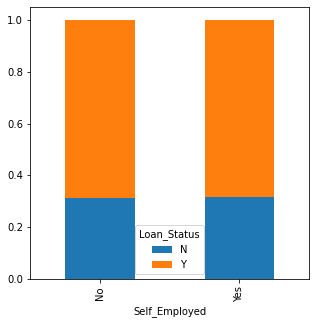

In [40]:
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

In [41]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])

In [42]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

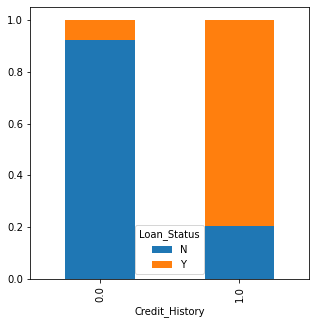

In [43]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

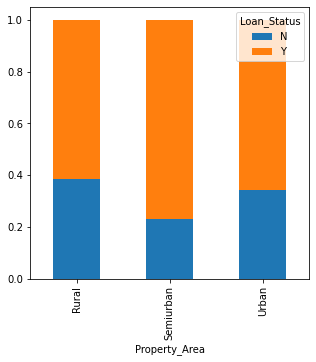

In [44]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

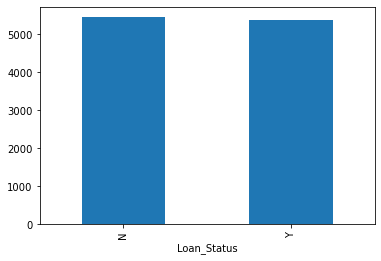

In [45]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [46]:
train.groupby('Loan_Status')['ApplicantIncome'].max()

Loan_Status
N    81000
Y    63337
Name: ApplicantIncome, dtype: int64

In [47]:
bin=[0,2500,5000,7500,81000]

In [48]:
group=['Low','Average','High', 'Very high'] 

In [49]:
train['Income_Bin']=pd.cut(train['ApplicantIncome'],bin,labels=group)

In [50]:
Income_Bin=pd.crosstab(train['Income_Bin'],train['Loan_Status'])

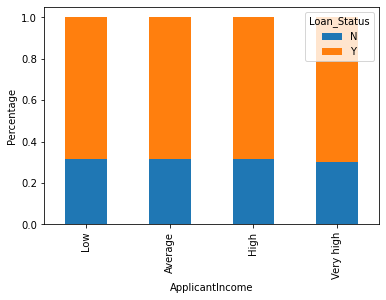

In [51]:
Income_Bin.div(Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')


In [52]:
train['CoapplicantIncome'].max()

41667.0

In [53]:
bin=[0,2500,7500,42000]
group=['Low','Average','High']

In [54]:
train['Coapplicant']=pd.cut(train['CoapplicantIncome'],bin,labels=group)

In [55]:
Coapplicant=pd.crosstab(train['Coapplicant'],train['Loan_Status'])

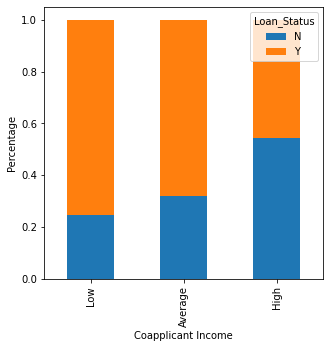

In [56]:
Coapplicant.div(Coapplicant.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Coapplicant Income")
A=plt.ylabel("Percentage")

In [57]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [58]:
train['Total_Income'].max()

81000.0

In [59]:
bins=[0,2500,5000,7500,81000]
group=['Low','Average','High','Very High']

In [60]:
train['Total_Income_Bin']=pd.cut(train['Total_Income'],bins,labels=group)

In [61]:
train['Total_Income_Bin'].head()

0       High
1       High
2    Average
3    Average
4       High
Name: Total_Income_Bin, dtype: category
Categories (4, object): [Low < Average < High < Very High]

In [62]:
Total_Income=pd.crosstab(train['Total_Income_Bin'],train['Loan_Status'])

In [63]:
Total_Income.head()

Loan_Status,N,Y
Total_Income_Bin,,
Low,14,10
Average,75,171
High,53,137
Very High,50,104


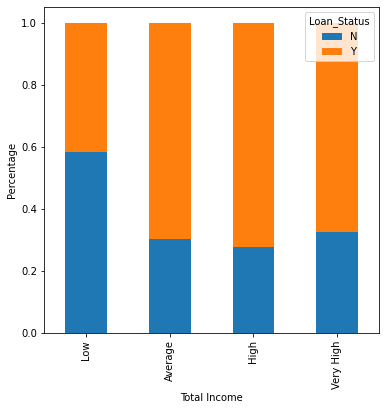

In [64]:
Total_Income.div(Total_Income.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel("Total Income")
P=plt.ylabel("Percentage")

In [65]:
train['LoanAmount'].max()

700.0

In [66]:
bin=[0,100,250,700]

In [67]:
label=['low','average','high']

In [68]:
train['LoanAmountBin']=pd.cut(train['LoanAmount'],bin,labels=label)

In [69]:
LoanAmountBin=pd.crosstab(train['LoanAmountBin'],train['Loan_Status'])

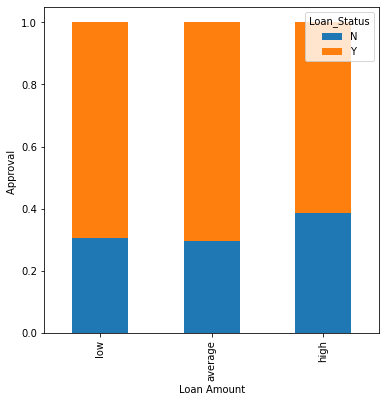

In [70]:
LoanAmountBin.div(LoanAmountBin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.xlabel('Loan Amount')
P=plt.ylabel('Approval ')

In [71]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'Coapplicant', 'Total_Income', 'Total_Income_Bin',
       'LoanAmountBin'],
      dtype='object')

In [72]:
train=train.drop(['Income_Bin','Coapplicant','Total_Income','Total_Income_Bin','LoanAmountBin'],axis=1)

In [73]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

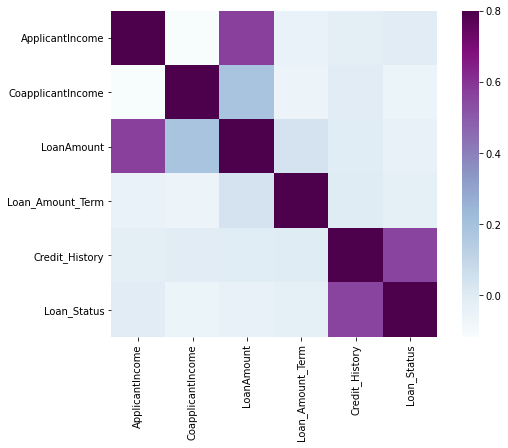

In [74]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");


In [75]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [77]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [78]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [79]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [81]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [80]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [82]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [83]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [84]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [85]:
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

In [86]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

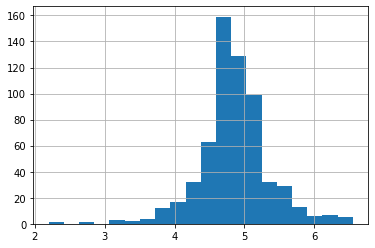

In [87]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

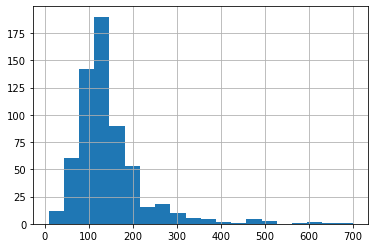

In [88]:
train['LoanAmount'].hist(bins=20)

In [89]:
train=train.drop('Loan_ID',axis=1) 


In [90]:
test=test.drop('Loan_ID',axis=1)

In [91]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status


In [92]:
X=pd.get_dummies(X)

In [93]:
train=pd.get_dummies(train) 
test=pd.get_dummies(test)


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_v,y_train,y_v =train_test_split(X,y,test_size=0.3)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
model=LogisticRegression()

In [99]:
model.fit(x_train,y_train)

c:\users\vishal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [100]:
model

LogisticRegression()

In [101]:
pred_v = model.predict(x_v)

In [102]:
accuracy_score(y_v, pred_v)

0.8162162162162162

In [103]:
pred_test = model.predict(test)

In [104]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [105]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [106]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [107]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [108]:
from sklearn.model_selection import StratifiedKFold

In [109]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index]  
    ytr,yvl = y[train_index],y[test_index]     
    model = LogisticRegression(random_state=1)  
    model.fit(xtr, ytr)    
    pred_test = model.predict(xvl)  
    score = accuracy_score(yvl,pred_test)  
    print('accuracy_score',score)  
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5


c:\users\vishal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\vishal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http

accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


c:\users\vishal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


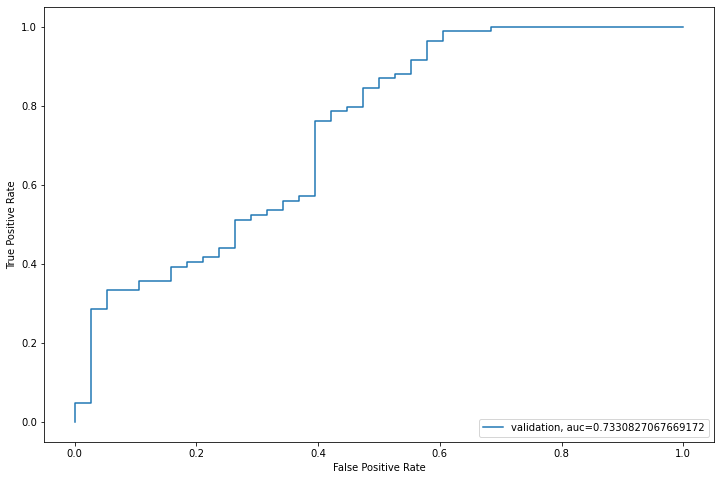

In [110]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4) 
plt.show()

In [111]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [112]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [113]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [114]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

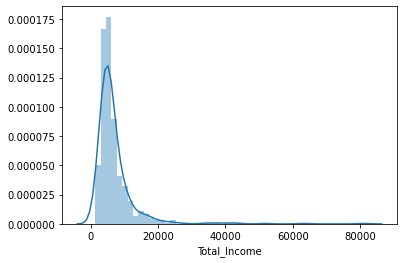

In [115]:
sns.distplot(train['Total_Income']);


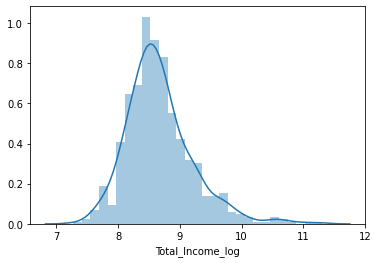

In [116]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [117]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

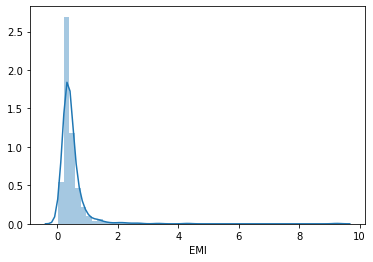

In [118]:
sns.distplot(train['EMI']);

In [119]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

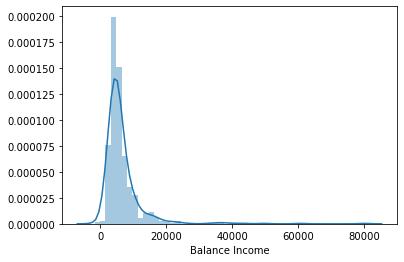

In [121]:
sns.distplot(train['Balance Income']);

In [120]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [122]:
X = train.drop('Loan_Status',1) 

In [123]:
y = train.Loan_Status 

In [126]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.7723577235772358

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7868852459016393


c:\users\vishal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [124]:
submission['Loan_Status']=pred_test    
submission['Loan_ID']=test_original['Loan_ID']


In [127]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [125]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

In [128]:
from sklearn import tree

In [129]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7560975609756098

2 of kfold 5
accuracy_score 0.6747967479674797

3 of kfold 5
accuracy_score 0.7479674796747967

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [130]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [131]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7704918032786885


In [132]:
pred_test = model.predict(test)

In [133]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

In [134]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)


In [135]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [139]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=61, random_state=1)

In [141]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)   
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8536585365853658

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7868852459016393


In [142]:
submission['Loan_Status']=pred_test  

In [143]:
submission['Loan_ID']=test_original['Loan_ID']

In [144]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [145]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Best Random Forest.csv')

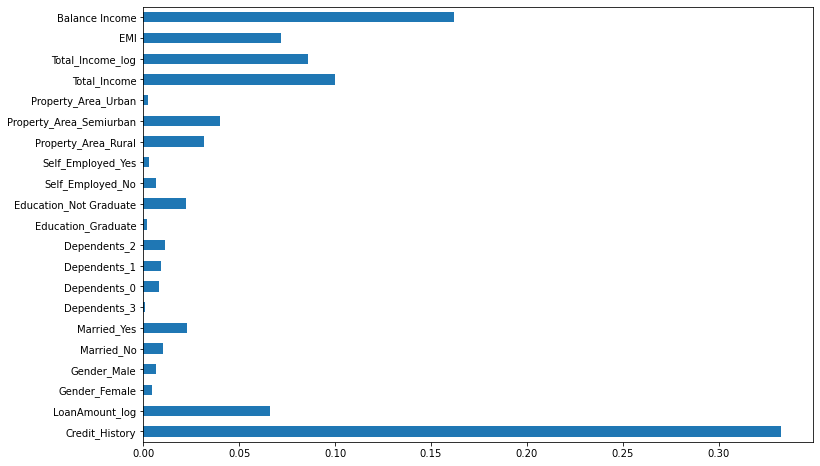

In [146]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))